In [2]:
from Bio.PDB import *
from Bio.PDB import DSSP

In [3]:
import pickle
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [5]:
p = PDBParser()
structure = p.get_structure("ubq", "1ubq.pdb")

In [6]:
model = structure[0]

In [7]:
 with open('1ubq_dssp.pickle', 'rb') as f:
        dssp = pickle.load(f)

In [8]:
fit = pd.read_csv("./fit/tau_4_exp.csv")
parameter_order = fit.constant
rides = fit.rId
rnames = [rname[0] for rname in fit.rName]
anames = fit.aName

In [9]:
fit.head()

,aName,constant,exp-4-a1,exp-4-a2,exp-4-a3,exp-4-tau1,exp-4-tau2,exp-4-tau3,limit,rId,rName
0,CD1,2.267511e-15,0.292980,0.617747,0.089273,0.000720,0.016623,0.778865,76,3,ILE
1,CG2,1.037444e-02,0.143372,0.273650,0.572603,0.000010,0.443295,0.105472,318,3,ILE
2,CG1,7.417473e-02,0.208262,0.186401,0.531162,0.000049,0.020938,0.072688,169,5,VAL
3,CG2,4.417964e-02,0.211100,0.583315,0.161406,0.000425,0.064021,0.359226,261,5,VAL
4,CG2,5.671618e-02,0.240048,0.619752,0.083484,0.000738,0.016494,0.140641,96,7,THR


In [10]:
secondary_structure = []
secondary_structure_dict = {'H':'α-helix', 'E': 'Strand', 'B': 'Isolated β-bridge residue',
                           'G': '3-10 helix', 'I': 'Π-helix', 'T': 'Turn', 'S': 'Bend', '-': '-'}
for rid in rides:
    a_key = list(dssp.keys())[rid]
    elem = dssp[a_key][2]
    secondary_structure.append(secondary_structure_dict[elem])

In [11]:
color_dict = {'α-helix': 'black', 'Isolated β-bridge residue': 'red', 'Strand': 'green','3-10 helix': 'blue',
              'Π-helix': 'cyan', 'Turn': '#afeeee', 'Bend': 'burlywood', '-': 'chartreuse'}

In [12]:
color = [color_dict[element] for element in list(secondary_structure)]

In [13]:
names = ["_".join(elem) for elem in zip(rnames, rides.astype(str), anames)]

In [14]:
height = parameter_order
bars = names
y_pos = np.arange(len(bars))

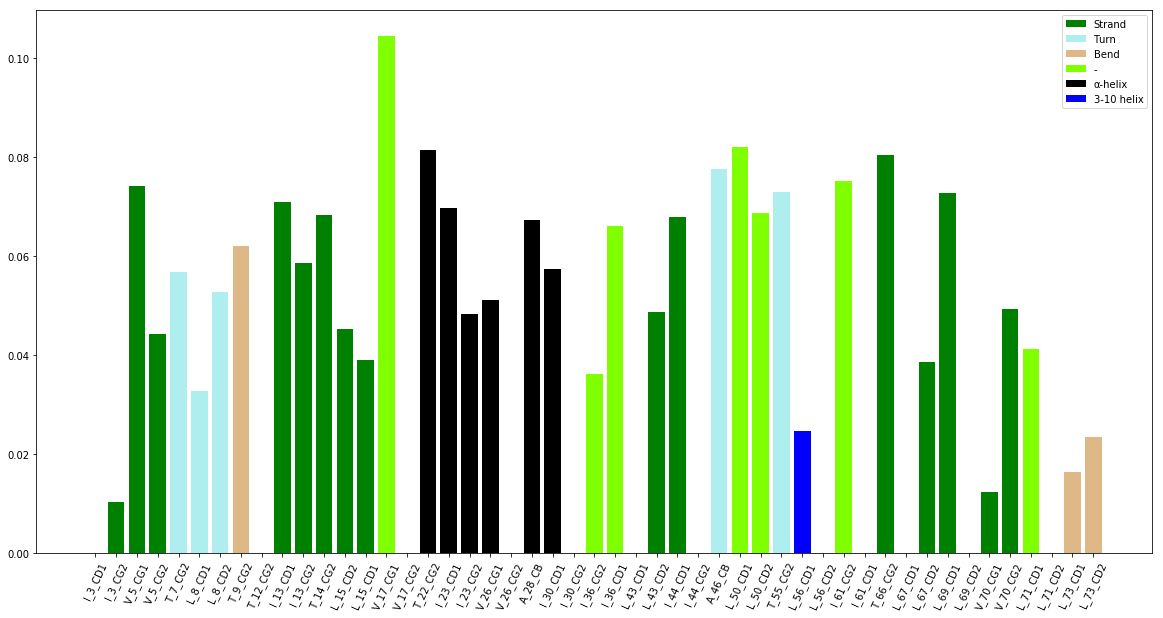

In [15]:
use =set()
plt.figure(figsize=(20,10))
for j in range(len(height)):
    label = secondary_structure[j]
    if label in use:
        label = None
    plt.bar(y_pos[j], height[j], color=color[j], label=label)
    use.add(secondary_structure[j])
plt.xticks(y_pos, bars, rotation=65)
plt.legend()
plt.show()